<a href="https://colab.research.google.com/github/Adevrari/Unsupervised-KMeans/blob/main/Unsupervised_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# **KMeans Case Study**

<hr>

**K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, I implement K-Means clustering to find intrinsic groups within the dataset that display the same behaviour.**

<hr>

# **Step 1 - Import the libraries**

**1. Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**3. Model Selection Libraries**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

<hr>

# **Step 2 - Data Loading**

In [ ]:
df = pd.read_csv("Cricket.csv", encoding = 'latin1')

**Data Inspection**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#5d576b',
        "color": 'white',
        "border-color":'white',
        'border-style': 'solid'
    }
)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.830000,21367,86.230000,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.980000,18048,78.860000,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.030000,17046,80.390000,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.360000,14725,91.200000,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.370000,16020,78.960000,19,77,28


**Insights**
  * **1. We need to work on the `HS` Columns**
  * **2. Using the `span` column we can find the numner of year that player played in total**

**Shape Inspection**

In [ ]:
a = df.shape
print(f'The rows are : {a[0]} and columns are {a[1]}')

The rows are : 79 and columns are 13


**Columns Inspection**

In [ ]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

**Information Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


**Insights**
  * **`HS` is object, it should be numeric**
  * **`span` is also object....needs to be transformed into span**


<hr>

# **Step 3 - Data Preprocessing / Feature Engineering**

**Wokring on the Span Columns**

In [ ]:
df[['StartYear', 'EndingYear']] = df['Span'].str.split("-", expand = True)

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#fb9692',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,StartYear,EndingYear
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.830000,21367,86.230000,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,1998,2015


**Checking for the datatype inorder to find experience**

In [ ]:
df["StartYear"].dtype

dtype('O')

Since this data is in object, we need to typecast to formulate the experience

In [ ]:
df[['StartYear', 'EndingYear']] = df[['StartYear', 'EndingYear']].astype(int)

In [ ]:
df["StartYear"].dtype

dtype('int64')

Working with the experience columns

In [ ]:
df['Experience'] = df['EndingYear'] - df['StartYear']

In [ ]:
df['Experience']

0     23
1     15
2     17
3     22
4     17
      ..
74    16
75    13
76    10
77    11
78    15
Name: Experience, Length: 79, dtype: int64

In [ ]:
df['Experience'].value_counts()

11    10
17     9
15     8
16     8
14     8
10     8
12     7
13     7
8      4
18     3
19     2
9      2
23     1
22     1
21     1
Name: Experience, dtype: int64

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#d09586',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,StartYear,EndingYear,Experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.830000,21367,86.230000,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,1998,2015,17


**Insights**
  **Most of the players are having the experience in between 10 - 17 years**

<hr>

**Working with the `HS`**

In [ ]:
df['HS'].value_counts()

119*    3
145     3
120*    3
131*    3
169     2
       ..
124     1
134*    1
130     1
159     1
156     1
Name: HS, Length: 62, dtype: int64

***Making a dataset specifically for HS, for better formulation**

In [ ]:
df2 = df['HS']

In [ ]:
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

**How to work upon the data**

In [ ]:
df[['HS', 'Extra']] = df['HS'].str.split('*', expand = True)

**Check for the values**

In [ ]:
df['HS']

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS, Length: 79, dtype: object

In [ ]:
df['Extra']

0         
1     None
2     None
3     None
4     None
      ... 
74        
75        
76        
77    None
78    None
Name: Extra, Length: 79, dtype: object

**Converting into integer**

In [ ]:
df['HS'] = df['HS'].astype(int)

**Data Check**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#c0d6e4',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,StartYear,EndingYear,Experience,Extra
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.830000,21367,86.230000,49,96,20,1989,2012,23,
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,2000,2015,15,None
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,1995,2012,17,None
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,1989,2011,22,None
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,1998,2015,17,None


**Dropping of the other irrelevant columns**

In [ ]:
df = df.drop(['Span', 'StartYear', 'EndingYear', 'Extra'], axis = 1)

**Data Check**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#b6ebcf',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.830000,21367,86.230000,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,17


**Null Check**

In [ ]:
df.isnull().sum().to_frame().style.set_properties(
    **{
        'background-color':'#b6ebcf',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


**Duplicates Check**

In [ ]:
df.duplicated().sum()

0

**Recheck on information of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  Experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


**Correlation Check**

<Axes: >

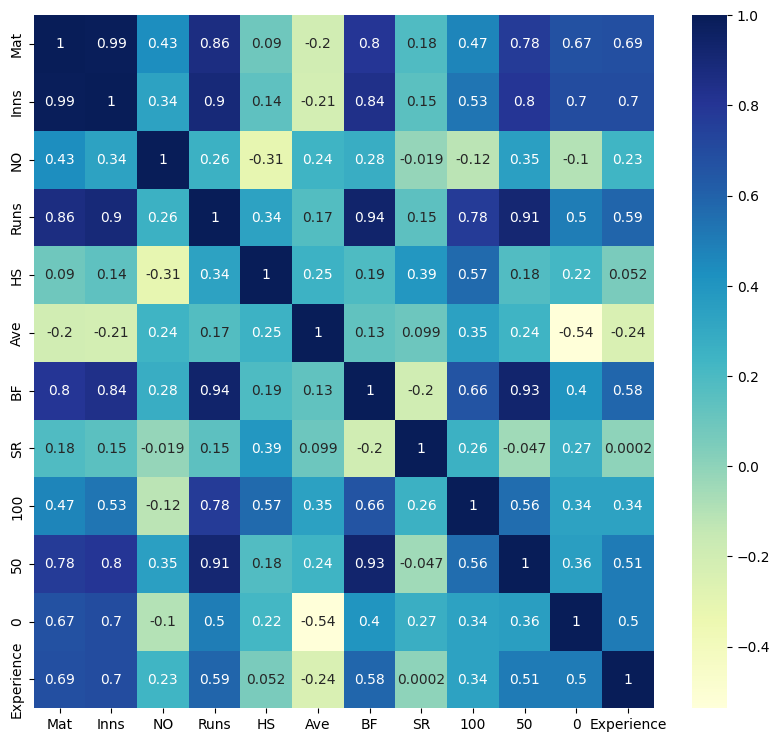

In [ ]:
plt.figure(figsize = (10, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

<hr>

# **Step 4 - Model Building Phase**

**We are going to make a copy of the original data, since after performing the clustering we need to map those clusters to the original data inorder see, which data point has been assigned to which clusters. Hence, this will have two datasets. First the original one and second without the `players` columns**

In [ ]:
df_copy = df.copy()

**Dropping of the players columns**

In [ ]:
df_copy = df_copy.drop('Player', axis = 1)

**Data Check**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#F0CA86',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.830000,21367,86.230000,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,17


**Standardizing the data**

In [ ]:
sc = StandardScaler()

Standardizing the data

In [ ]:
df_scaled = sc.fit_transform(df_copy)

Return a array of all the standardized values

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

Creating a dataframe where all the values are in a order

In [ ]:
scaled_df = pd.DataFrame(df_scaled, columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Experience'])

In [ ]:
# Data overview
scaled_df.style.set_properties(
    **{
        'background-color':'#F0CA86',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
5,1.802592,1.709574,1.602358,1.625156,-0.394164,0.169465,1.930813,-0.512591,-0.193637,2.249953,1.145837,0.684919
6,1.124538,1.194365,1.602358,1.562056,-0.329828,0.992383,1.953815,-0.649476,0.676941,2.434592,0.636337,1.292882
7,0.894000,0.994006,-0.491131,1.476872,1.085581,0.424501,1.806031,-0.567345,1.298783,1.572941,0.466504,0.380938
8,1.341515,1.251610,0.695180,1.289939,0.120530,0.108256,1.764438,-0.816780,0.055100,2.249953,-0.042996,0.380938
9,0.731268,0.836581,0.136916,1.099063,0.635224,0.332688,1.071840,0.021768,0.925678,1.019023,0.466504,0.988900


<hr>

**Implementation to KMeans**
  * **Using elbow method to find the optimal number of clusters**

  * **Elbow Method: The elbow method is used to determine the optimal number of clusters in K-means clustering. if K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.**

  * **The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.**

In [ ]:
# way to find the best cluster that is elbow method

# Step 1: Set the range
clusters = list(range(2, 8))
# Step 2: Formulate a loop and capture the WCSS (Withing Cluster sum of squared of distance)
ssd = []
# Step3: runnning a for loop
for x in clusters:
  # Step 4 - Implementing the KMeans with each values of X
  model = KMeans(n_clusters = x, random_state = 50)
  # Step 5 - Fitting the data
  model.fit(scaled_df)
  # Step 6 - Capturing the WCSS
  ssd.append(model.inertia_)
  print(f'The WCSS of the model with clusters = {x} is: {model.inertia_}')

The WCSS of the model with clusters = 2 is: 644.829826892706
The WCSS of the model with clusters = 3 is: 531.5685807806851
The WCSS of the model with clusters = 4 is: 464.9897975808977
The WCSS of the model with clusters = 5 is: 416.8257718293502
The WCSS of the model with clusters = 6 is: 376.58757500896354
The WCSS of the model with clusters = 7 is: 336.0695720959377


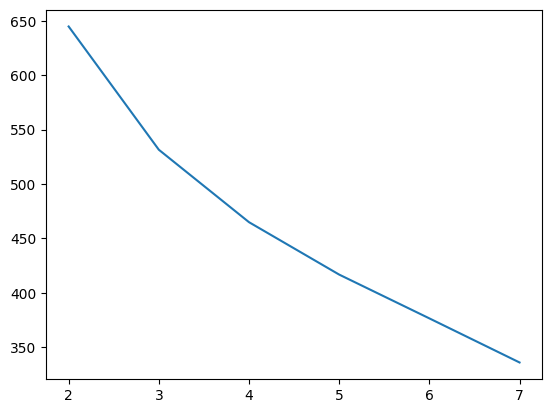

In [ ]:
plt.plot(clusters, ssd)

**The optimal values for the cluster seems to be either 3 or 4**

<hr>

**Using of `silhouette Method` for confirming the number of clusters, that is best out of the two**

In [ ]:
# way to find the best cluster that is elbow method

# step 1: Set the range
clusters = list(range(2, 8))
# step 2: Formulate a loop and capture the WCSS (Withing Cluster sum of squared of distance)
scoreList = []
# runnning a for loop
for x in clusters:
  # Step 4 - Implementing the KMeans with each values of X
  model = KMeans(n_clusters = x, random_state = 50)
  # Step 5 - Fitting the data
  model.fit(scaled_df)
  # Step 6 - Getting the clusters labels
  cluster_labels = model.labels_
  # Step 7 - Getting a score on the basis of how the data has been labelled with respect to labels_
  score = silhouette_score(scaled_df, cluster_labels)
  scoreList.append(score)
  print(f'For {x} clusters, score is {score}')

For 2 clusters, score is 0.3136820966012298
For 3 clusters, score is 0.2145859150936642
For 4 clusters, score is 0.20533122063552012
For 5 clusters, score is 0.20736135372000328
For 6 clusters, score is 0.18852859678609948
For 7 clusters, score is 0.1817544285967207


**From here we can conclude that since the values for 3 is more than that of k = 4, we can conclude that the best k is 3**

<hr>

**Implementing the KMeans with num of clusters being 3**

In [ ]:
model = KMeans(n_clusters = 3, random_state=50)

In [ ]:
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=50)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
df['Cluster Assigned'] = model.labels_

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#9AD7A4',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience,Cluster Assigned
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.830000,21367,86.230000,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.980000,18048,78.860000,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.030000,17046,80.390000,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.360000,14725,91.200000,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.370000,16020,78.960000,19,77,28,17,0


In [ ]:
df['Cluster Assigned'].value_counts()

1    40
2    30
0     9
Name: Cluster Assigned, dtype: int64

**For visualizing we will be choosing few columns and doing the prediction on them**

In [ ]:
X = scaled_df.iloc[:, [3, 6]].values
X

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [ ]:
pred = model.fit_predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Putting data into dataframe**

In [ ]:
DF = pd.DataFrame(X, columns=['NO', 'Ave'])

In [ ]:
DF['Pred Cluster Values'] = pred

In [ ]:
DF.head().style.set_properties(
    **{
        'background-color':'#FDAEA9',
        "color": 'black',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,NO,Ave,Pred Cluster Values
0,4.262328,3.681214,2
1,2.609117,2.635385,2
2,2.400099,2.319651,2
3,2.292041,1.588295,2
4,1.984430,1.996354,2


**Visualize**

<Axes: xlabel='Not outs', ylabel='Average'>

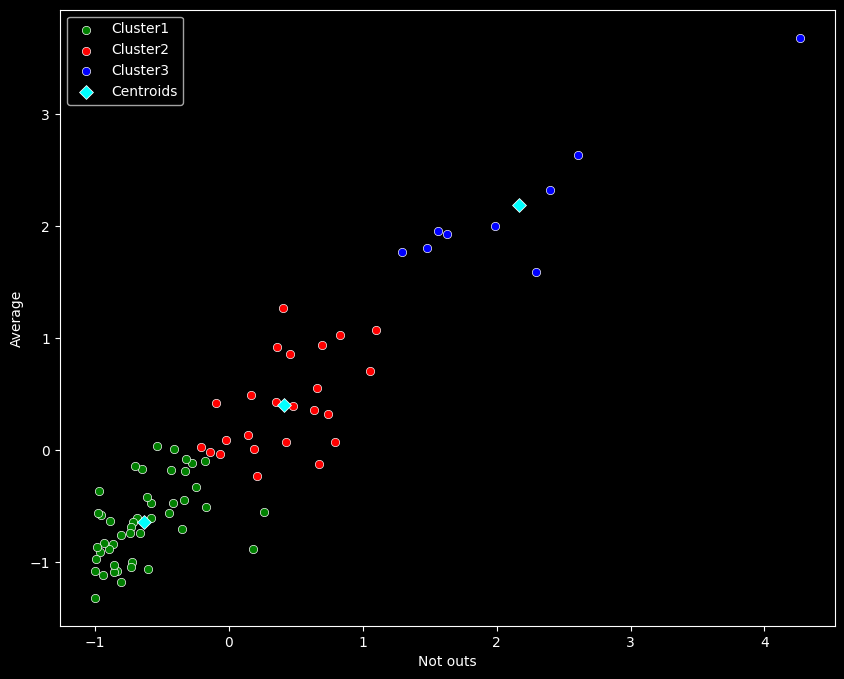

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 8))

sns.scatterplot(x = X[pred == 0, 0], y = X[pred == 0, 1] , color = 'green', label = 'Cluster1')
sns.scatterplot(x = X[pred == 1, 0], y = X[pred == 1, 1] , color = 'red', label = 'Cluster2')
sns.scatterplot(x = X[pred == 2, 0], y = X[pred == 2, 1] , color = 'blue', label = 'Cluster3')
sns.scatterplot(x = X[pred == 3, 0], y = X[pred == 3, 1] , color = 'yellow', label = 'Cluster4')

plt.xlabel("Not outs")
plt.ylabel("Average")
sns.scatterplot( x = model.cluster_centers_[0:4, 0], y =  model.cluster_centers_[0:4, 1], color = 'cyan',
                label = 'Centroids',s=50,marker='D')